In [1]:
import pandas as pd

In [2]:
online= pd.read_excel("Online Retail.xlsx")  #importing the data

In [3]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
def get_day(x): return pd.datetime(x.year, x.month, x.day) #a function to get the day of the invoice excluding time

In [5]:
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 


grouping = online.groupby('CustomerID')['InvoiceDay'] 


online['CohortDay'] = grouping.transform('min')


In [6]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [7]:
def get_date_int(df, column):  # function to get the year, month, day of the date
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [8]:
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

In [9]:
years_diff = invoice_year - cohort_year


months_diff = invoice_month - cohort_month


days_diff = invoice_day- cohort_day


online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1

In [10]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


In [11]:
# Grouping the data on the basis of Cohort day and Cohort Index and shifting the values of the Cohort Index to the columns
grouping = online.groupby(['CohortDay', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

 
cohort_counts = cohort_data.pivot(index='CohortDay', columns='CohortIndex', values='CustomerID')


cohort_sizes = cohort_counts.iloc[:,0]


retention = cohort_counts.divide(cohort_sizes, axis=0)

In [12]:
retention.head()


CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0
CohortDay,,,,,,,,,,,,,,,,,,,,,
2010-12-01,1.0,0.091837,0.040816,NaN,0.071429,0.071429,0.040816,0.102041,0.102041,0.051020,...,0.081633,0.091837,0.081633,NaN,0.020408,0.051020,0.081633,0.071429,0.081633,0.05102
2010-12-02,1.0,0.018519,NaN,NaN,0.027778,0.064815,0.046296,0.111111,0.046296,NaN,...,0.083333,0.046296,NaN,NaN,0.037037,0.027778,0.046296,0.027778,0.018519,NaN
2010-12-03,1.0,NaN,0.020408,0.020408,0.020408,0.040816,0.102041,NaN,NaN,0.020408,...,0.102041,NaN,0.040816,0.040816,0.102041,0.020408,0.081633,NaN,NaN,NaN
2010-12-05,1.0,0.044118,0.044118,0.029412,0.044118,0.014706,NaN,0.088235,0.102941,0.044118,...,0.088235,0.029412,0.044118,0.058824,0.044118,0.014706,NaN,NaN,NaN,NaN
2010-12-06,1.0,0.026316,0.052632,0.052632,0.013158,NaN,0.013158,0.039474,0.171053,0.092105,...,0.039474,0.039474,0.078947,0.039474,0.013158,NaN,NaN,NaN,NaN,NaN


In [13]:
cohort_data2 = grouping['UnitPrice'].mean()


cohort_data2 = cohort_data2.reset_index()

 
average_quantity = cohort_data2.pivot(index='CohortDay', columns='CohortIndex', values='UnitPrice')

In [14]:
average_quantity.head()

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0
CohortDay,,,,,,,,,,,,,,,,,,,,,
2010-12-01,3.170843,3.923231,3.988235,NaN,2.809098,3.490497,3.444846,2.490583,3.929679,2.894496,...,3.461569,3.153455,3.285797,NaN,1.900390,1.872989,2.259188,3.407155,2.872507,2.743047
2010-12-02,3.142678,0.990000,NaN,NaN,2.689773,2.402099,3.189143,4.147600,2.790888,NaN,...,3.859273,2.654773,NaN,NaN,2.590000,3.657500,4.596160,3.168571,2.227778,NaN
2010-12-03,3.265201,NaN,2.761739,2.726111,9.950000,4.175000,3.463889,NaN,NaN,11.850000,...,2.734000,NaN,2.065385,2.140099,2.668941,2.433333,3.824516,NaN,NaN,NaN
2010-12-05,2.912395,4.516552,4.417538,10.941667,3.294478,2.712121,NaN,2.536276,2.833077,3.827273,...,2.959121,2.582329,2.997474,2.997719,4.725882,0.978421,NaN,NaN,NaN,NaN
2010-12-06,2.921867,6.783333,1.767500,2.881845,4.581034,NaN,2.926216,3.226176,3.095167,3.354824,...,2.691772,1.823774,2.341687,4.650800,7.666667,NaN,NaN,NaN,NaN,NaN


In [15]:
!conda install -c conda-forge seaborn --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    statsmodels-0.9.0          |   py36h7eb728f_0        15.5 MB  conda-forge
    patsy-0.5.1                |             py_0         187 KB  conda-forge
    pandas-0.23.4              |   py36hf8a1672_0        27.8 MB  conda-forge
    seaborn-0.9.0              |             py_0         159 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        43.6 MB

The following packages will be UPDATED:

    pandas:      0.23.4-py37h04863e7_0 --> 0.23.4-py36hf8a1672_0 conda-forge
    patsy:       0.5.0-py37_0          --> 0.5.1-py_0            conda-forge
    seaborn:     0.9.0-py37_0          --> 0.9.0-py_0            conda-forge
    

In [16]:
import datetime

In [17]:
snapshot_date = max(online.InvoiceDate) + datetime.timedelta(days=1) #Taking the last Invcoie date of the dataset

In [18]:
datamart = online.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days, 'InvoiceNo':'count'})

In [19]:
datamart.head()

,InvoiceDate,InvoiceNo
CustomerID,,
12346.0,326,2
12347.0,2,182
12348.0,75,31
12349.0,19,73
12350.0,310,17


This transformed InvoiceDate will be the Recent Date of Purchase and the No. of Invoices will be the Frequency of Purchase

In [20]:
datamart.rename(columns={'InvoiceDate': 'Recent', 'InvoiceNo': 'Frequency'}, inplace=True)

In [21]:
datamart.head()

,Recent,Frequency
CustomerID,,
12346.0,326,2
12347.0,2,182
12348.0,75,31
12349.0,19,73
12350.0,310,17


In [22]:
r_labels = range(5,0,-1)
f_labels = range(1,6)
r_gr = pd.qcut(datamart['Recent'], q=5, labels=r_labels)
f_gr= pd.qcut(datamart['Frequency'], q=5, labels=f_labels)

In [23]:
datamart=datamart.assign(R=r_gr, F=f_gr)
#datamart.head()
datamart['RF_SC'] = 0
datamart['RF_SC'] = datamart[['R','F']].sum(axis=1)


In [24]:
datamart.head()

,Recent,Frequency,R,F,RF_SC
CustomerID,,,,,
12346.0,326,2,1,1,2.0
12347.0,2,182,5,5,10.0
12348.0,75,31,2,3,5.0
12349.0,19,73,4,4,8.0
12350.0,310,17,1,2,3.0


In [25]:
def Level_rf(df): # A function to define labels for customers based on RF_SC
    if df['RF_SC'] >= 8:
        return 'Top'
    elif df['RF_SC']>=4:
        return 'Mid'
    else:
        return 'Low'

In [26]:
datamart['RF_Seg']= datamart.apply(Level_rf, axis=1)

In [27]:
datamart.head()

,Recent,Frequency,R,F,RF_SC,RF_Seg
CustomerID,,,,,,
12346.0,326,2,1,1,2.0,Low
12347.0,2,182,5,5,10.0,Top
12348.0,75,31,2,3,5.0,Mid
12349.0,19,73,4,4,8.0,Top
12350.0,310,17,1,2,3.0,Low


In [28]:
datamart['R'] = pd.to_numeric(datamart['R'])
datamart['F'] = pd.to_numeric(datamart['F'])

In [29]:
rf_agg = datamart.groupby(['RF_Seg']).agg({'R':'mean', 'F':['mean','count']})

In [30]:
rf_agg

R         F      
            mean      mean count
RF_Seg                          
Low     1.255760  1.298387   868
Mid     2.800472  2.707075  2120
Top     4.432803  4.468208  1384

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
datamart_rf=  datamart.loc[:,['Recent', 'Frequency']] 

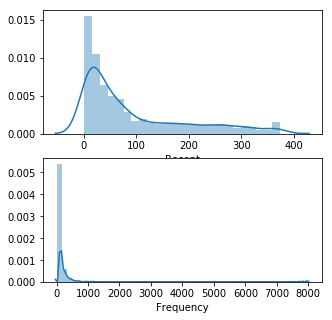

In [34]:
plt.figure(figsize=(5,5))
plt.subplot(2,1,1); sns.distplot(datamart_rf['Recent'])
plt.subplot(2,1,2); sns.distplot(datamart_rf['Frequency'])
plt.show()

Here, the variables _Recent_ and _Frequency_ are highly skewed. So to unskew them, I am applying log-transformation and then Standard Scaling

In [35]:
datamart_log = np.log(datamart_rf)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scale = StandardScaler()
scale.fit(datamart_log)
datamart_scaled = scale.transform(datamart_log)

In [38]:
datamart_scaled = pd.DataFrame(data=datamart_scaled, columns=['Recent', 'Frequency'])

In [39]:
datamart_scaled.head()

,Recent,Frequency
0,1.402917,-2.230272
1,-2.075135,1.133419
2,0.399593,-0.186462
3,-0.537936,0.452198
4,1.368554,-0.634452


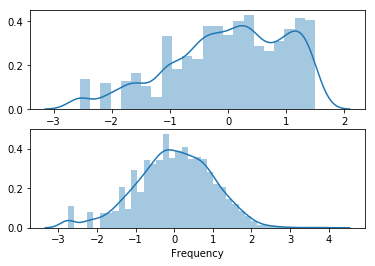

In [41]:
plt.subplot(2,1,1); sns.distplot(datamart_scaled['Recent'])
plt.subplot(2,1,2); sns.distplot(datamart_scaled['Frequency'])
plt.show()

Now, the skewedness of the variables is highly reduced ( although it is not completely unskewed)

In [42]:
from sklearn.cluster import KMeans  # A loop to find Sum of Squared Errors to get the best number of clusters
sse={}
for i in range(1,15) :
    kmeans= KMeans(n_clusters=i, random_state=1)
    kmeans.fit(datamart_scaled)
    sse[i] = kmeans.inertia_

In [43]:
sse_df = pd.DataFrame.from_dict(sse, orient='index', columns=['SSE'])

In [44]:
sse_df.reset_index(level=0, inplace=True)
sse_df.head()

,index,SSE
0,1,8744.000000
1,2,4423.588529
2,3,3251.825354
3,4,2601.156450
4,5,2042.079054


In [45]:
sse_df = sse_df.rename(columns= {'index': "K", 'SSE':'SSE'})


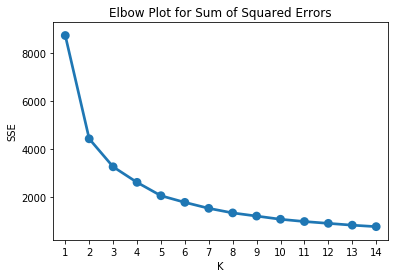

In [46]:
sns.pointplot(x='K', y='SSE', data=sse_df)
plt.title("Elbow Plot for Sum of Squared Errors")
plt.show()

In this _Elbow Plot_ the Elbow occurs at approximately 2 or 3. So, I am taking 3 clusters as the optimal number of clusters.

In [47]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(datamart_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [48]:
clust_lables = kmeans.labels_

In [49]:
datamart_clust3 = datamart_rf.assign(Cluster=clust_lables) #Assigning the clusters to the CustomerID

In [50]:
datamart_clust3.head()

,Recent,Frequency,Cluster
CustomerID,,,
12346.0,326,2,2
12347.0,2,182,0
12348.0,75,31,1
12349.0,19,73,1
12350.0,310,17,2


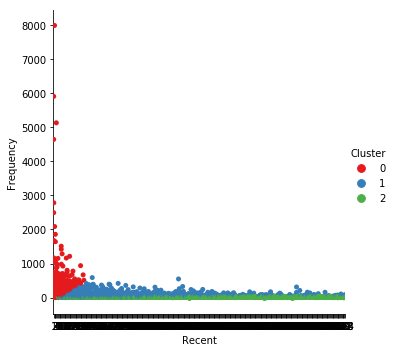

In [51]:
sns.catplot(x='Recent', y='Frequency', data=datamart_clust3, hue='Cluster', palette='Set1')
plt.show()

In [52]:
datamart["RF_Seg"]= datamart['RF_Seg'].astype('category')

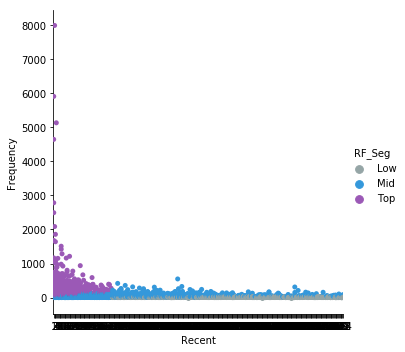

In [53]:
sns.catplot(x='Recent', y='Frequency', data=datamart, hue='RF_Seg', palette =dict(Top="#9b59b6", Mid="#3498db", Low="#95a5a6"))
plt.show()

Above, there are 2 scatterplots. 
1. The 1st one is obtained by clustering the customers using KMeans CLustering.
2. The 2nd one is obtained by segmenting the customers based on their Cohort Analysis.

A Business will always try to target customers or probable customers who are _Frequent_ Purchasers and/or _Recent_.
From the above 2 Categorical Plots, what I  can infer is that-

 ~For the KMeans Clustering Plot, the region corresponding to the Red color should be the target audience who are interested in buying or are recent customers. The Red Region corresponds to the Customers who are Recent and/or Frequent.
 
 ~For the Segmentation plot, the region corresponding to the Purple color should be the target audience corresponding to 'Top'.


The **Target Region** in the Segmentation plot is greater, so it covers a greater number of people.
So, I will be taking into consideration the 2nd plot and its corresponding Dataset.
The Dataset for this plot is ***datamart***.

In [54]:
datamart.head()

,Recent,Frequency,R,F,RF_SC,RF_Seg
CustomerID,,,,,,
12346.0,326,2,1,1,2.0,Low
12347.0,2,182,5,5,10.0,Top
12348.0,75,31,2,3,5.0,Mid
12349.0,19,73,4,4,8.0,Top
12350.0,310,17,1,2,3.0,Low


In [55]:
datamart2 = datamart[datamart['RF_Seg'] == 'Top']

In [56]:
datamart2 = datamart2[datamart2['Frequency'] >=500] # For being very targetting towards the Most Frequent Customers

In [57]:
Index = list(datamart2.index)

Now, based on the CustomerID(index), I will fetch the data from the _online_ dataset

In [58]:
online2 = online[online['CustomerID'].isin(Index)]

In [59]:
online2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom,2010-12-01,2010-12-01,1.0
107,536381,84854,GIRLY PINK TOOL SET,5,2010-12-01 09:41:00,4.95,15311.0,United Kingdom,2010-12-01,2010-12-01,1.0
108,536381,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01 09:41:00,1.95,15311.0,United Kingdom,2010-12-01,2010-12-01,1.0
109,536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,2010-12-01 09:41:00,2.10,15311.0,United Kingdom,2010-12-01,2010-12-01,1.0
110,536381,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,6,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,2010-12-01,2010-12-01,1.0


Now, a dataset of only the 'Top' Customers is obtained.

In [60]:
Countries = online2['Country'].unique()

In [61]:
Countries

array(['United Kingdom', 'EIRE', 'Germany', 'France', 'Netherlands',
       'Australia'], dtype=object)

In [62]:
import requests

In [63]:
from bs4 import BeautifulSoup

In [64]:
Countries = list(Countries)
Countries[0] = 'UK'
Caps =[0,0,0,0,0,0]
for i,c in enumerate(Countries):
    url = 'https://restcountries.eu/rest/v2/name/{}?fullText=true'.format(c)
    result = requests.get(url).text
    soup = BeautifulSoup(result, 'lxml')
    cap = soup.find('p')
    Caps[i] = cap.text.split(',')[5].split(':')[1]
       

In [65]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          82 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.17.0-py_0 conda-forge


geopy-1.17.0         | 49 KB     | ##################################### | 100% 
geographiclib-1.49   | 32 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [66]:
from geopy.geocoders import Nominatim

In [67]:
gl = Nominatim(user_agent="my-application")
Lat=[]
Long=[]
for c in Caps:
    loc = gl.geocode(c)
    Lat.append(loc.latitude)
    Long.append(loc.longitude)

Here, I have obtained the Latitudes and Longitudes of the Capitals of the Countries of Target Customers. Using this, I will try to search for trending venues near the Capitals of these Countries.

Here, I will use FourSquare API to fetch the trending venues near the capitals of the countries

In [92]:
CLIENT_ID = 'KUN320FISBMCXXD1FSZSMHZDPPXBCR1LPTLL1J0DMFTRCPZN' 
CLIENT_SECRET = 'BC51R2HDZOOHHCVN0XDV0LKOVPV4SHYI1A4D51QC2F15G510' 
VERSION = '20181217'

In [103]:
venues_list=[]
count=0
for cont, caps, lat, lng in zip(Countries,Caps, Lat, Long):
    url= 'https://api.foursquare.com/v2/venues/trending?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,50000000000000,100)
    results = requests.get(url).json()["response"]['venues']
    venues_list.append([(
            cont,caps, 
            lat, 
            lng, 
            v['name'],
            v['location']['lat'], 
            v['location']['lng']) for v in results])
        
Trending = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
Trending.columns = ['Country', 'Capital', 
                  'Capital Latitude', 
                  'Capital Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']

In [102]:
Trending

,Country,Capital,Capital Latitude,Capital Longitude,Venue,Venue Latitude,Venue Longitude
0,UK,"""London""",51.507322,-0.127647,London Heathrow Airport (LHR) (London Heathrow...,51.469408,-0.462348
1,Germany,"""Berlin""",52.517037,13.388860,Flughafen Berlin-Tegel Otto Lilienthal (TXL) (...,52.554516,13.293071
2,France,"""Paris""",48.856610,2.351499,Aéroport Paris-Charles de Gaulle (CDG) (Aéropo...,49.006053,2.572303
3,Netherlands,"""Amsterdam""",52.374540,4.897976,Amsterdam Airport Schiphol (AMS) (Amsterdam Ai...,52.308570,4.762123


Here, I have got the "Table" for the trending places in the capital of the Target Countries.
I have chosen the capitals for the purpose of simplicity.

Now, a nice plot of the above areas will give a better idea of the Target Segments.

In [71]:
!conda install -c conda-forge folium --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.7.0               |             py_0          54 KB  conda-forge
    altair-2.3.0               |        py36_1001         533 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         640 KB

The following NEW packages will be INSTALLED:

    altair:  2.3.0-py36_1001 conda-forge
    branca:  0.3.1-py_0      conda-forge
    folium:  0.7.0-py_0      conda-forge
    vincent: 0.4.4-py_1      conda-forge


vincent-0.4.4        | 28 KB     | #############################

In [72]:
import folium

In [104]:
Map = folium.Map(location=[50,10], zoom_start=5)
for ven,lat,lng in zip(Trending['Venue'] ,Trending['Venue Latitude'], Trending['Venue Longitude']):
    label = '{}'.format(ven)
    folium.Marker([lat,lng], popup=label).add_to(Map)
      
Map

As on 17th Dec 2018, these were the trending areas as per the FourSquare API. But the list ,of trending areas, is very dynamic and changes on a daily basis.

This forms a Cohort of _Target Areas_  where any online/non-online retail store should focus on

-Notebook by

 ### **Sumit Bhattacharya**
   
  #### Dated: 17th Dec, 2018